# L01-04 Manual Linear Regression

In [1]:
import torch

In [2]:
# data
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])
# print(type(x_data), '\n', x_data,'\n', x_data.data, '\n', x_data.requires_grad)

In [3]:
# model
class LinearRegression:
    def __init__(self):
        self.weight = torch.Tensor([1.0])
        self.weight.requires_grad_()
        self.bias = torch.Tensor([0.0])
        self.bias.requires_grad_()
        
    def __call__(self, *args, **kargs):
        return args[0] * self.weight + self.bias

    def forward(self, x):
        return x * self.weight + self.bias
    
    def parameters(self):
        # return {'weight':self.weight, 'bias':self.bias}
        return self.weight, self.bias
    
linearModel = LinearRegression()

In [4]:
# loss
class MSELoss:
    def __init__(self):
        pass
    
    def loss(self, y_pred, y):
        loss = (y_pred - y) ** 2
        return loss
        
criterion = MSELoss()

In [5]:
# optimizer
class SGD:
    def __init__(self, params, lr=0.01):
        print(params)
        # self.weight = params['weight']
        # self.bias = params['bias']
        self.params = params
        self.lr = lr
        
    def step(self):
        # self.weight.data -= self.lr*self.weight.grad.data
        # self.bias.data -= self.lr*self.bias.grad.data
        for param in self.params:
            param.data -= self.lr*param.grad.data
        
    def zero_grad(self):
        # self.weight.grad.data.zero_()
        # self.bias.grad.data.zero_()
        for param in self.params:
            param.grad.data.zero_()
        
optimizer = SGD(linearModel.parameters(), lr=0.01)

(tensor([1.], requires_grad=True), tensor([0.], requires_grad=True))


In [6]:
# train
epoch = 0
train_loss = []

while True:
# for epoch in  range(100):
    y_pred = linearModel.forward(x_data[epoch%3])
    loss = criterion.loss(y_pred, y_data[epoch%3])
    train_loss.append(loss.item())
    
    loss.requires_grad_() # required, descent quicker
    loss.backward() # pytorch helps refresh grad automatically
    optimizer.step()
    optimizer.zero_grad()
    
    if(loss.item() <= 1e-5 or epoch >= 1000):
        break
    else:
        epoch += 1

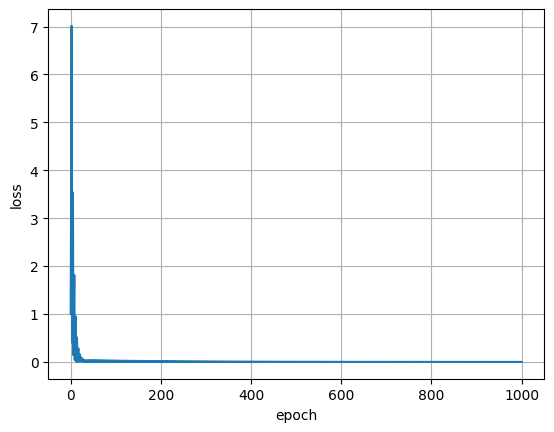

In [10]:
# train_plot
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show() # ugly, since only use 1 data calculate loss, aka use SGD, but accuracy is pretty

In [8]:
# train_param
print('w=', linearModel.weight.item())
print('b=', linearModel.bias.item())

w= 1.9864568710327148
b= 0.03050394169986248


In [9]:
# test
x_test = torch.Tensor([[4.0]])
y_test = linearModel(x_test)
print('y_pred=', y_test.data)

y_pred= tensor([[7.9763]])
